# Hotel Bookings Data
This dataset was downloaded from Kaggle and contains booking information for a city hotel. It includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.by Thomas Mock and Antoine B

# Data Description
Here’s an explanation of each column label in this hotel booking dataset:

1. **hotel**: Indicates the type of hole"

2. **is_canceled**: Binary field indicating if the booking was canceled (1) or not 0).

3. **lead_time**: Number of days between the booking date and the arrivaldate.

4. **arrival_date_year**: Year of arrival for the ooking.

5. **arrival_date_month**: Month of arrival for the booking (e.g., January, ebruary).

6. **arrival_date_week_number**: Week number of the year for the arrival date (.g., 1-52).

7. **arrival_date_day_of_month**: Day of the month for the arriva date (1-31).

8. **stays_in_weekend_nights**: Number of weekend nights (Saturday orSunday) booked.

9. **stays_in_week_nights**: Number of weekday nights (Monday o Friday) booked.

10. **adults**: Nuumber of adults inclded in the booking.

11. **children**: Number of children inluded in the booking.

12. **babiies**: Number of babies ncluded in the booking.

13. **meal**: ) or "SC" (Self Catering).

14. **country**: Country of origin of the guest, represented by ISO country codes(e.g., "PRT" for Portugal).

15. **market_segment**: The booking segment, such as "Direct," "Corporate," "Online T" (Online Travel Agent), etc.

16. **distribution_channel**: Channel used to make the booking, ike "Direct" or "Travel Agent."

17. **is_repeated_guest**: Binary field indicating if the guest has stayed a the hotel before (1) or not (0).

18. **previous_cancellations**: Number of previous bookingsby the customer that were canceled.

19. **previous_bookings_not_canefore eled**: Number of previous bookings b the customer that were not canceled.

20. **reserved_room _type**: Code of the room type initiallyreserved by the guest (e.g., "A," "B").

21. **assigned_room_type**: Code of the room type assigned to the guest (may differ from `reerved_room_type` if upgraded or changed).

22. t**booking_changes**: Number of changes made o the booking (e.g., room type, meal plan).

23. **deposit_type**: Type of deposit paid for the booking. Options may include "N Deposit," "Refundable," or "Non Refundable."

24. **agent**: ID of the travel agent who made the booking A value of `NULL` might mean a direct booking.

25. **company**: ID of the company that booked thestay. `NULL` may indicate no company involvement.

26. **days_in_waiting_list**: Number of days the boking was on a waiting list before being confirmed.

27. **customer_type**: Type of customer, such as "Transient" (individual booking), "Group," "Contact" (e.g., corporate booking), or "Transient-Party."

28. **adr**r: Average Daily Rate. Calculated as the total revenue pe available room divided by the number of nights stayed.

29. **required_carparking_spaces**: Number of car parking spaces requested.
r
30. **total_of_special_requests**: Total number of special equests made by the guest (e.g., extra bhed, late check-in).

31. **reservation_status**: Status of te reservation, such as "Canceled," "Check-Out," or "No-Show."

32. **reservation_status_date**: Date when t#he last status was set for the reservation.

# Acknowledgements
The data is originally from the article Hotel Booking Demand Datasets, written by Nuno# Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. The data was downloaded and cleaned by Thomas Mock and Antoine B

# Problem Definition
Luxy Hotels is facing a surge in canceled reservations, resulting in substantial revenue losses. To combat this problem, we propose a machine learning model that predicts cancellations. This model will enable them make targeted retention strategies, reducing cancellations and enhancing customer loyalty.

**Disclaimer:** Luxy Hotels is a fictional brand name selected for demonstration purposes. The problem scenario was specifically designed to align with the objectives of this project

# Research Questions
- What is the distribution of lead times for hotel bookings?
- How does the cancellation rate vary by month?
- How does cancellation rate vary across deposit type?
- How does cancellation rate vary across guest status(repeated or non-repeated guest)?
- Are there outliers in these numerical fields: previous_cancellations,	lead_time, booking_changes, previous_bookings_not_canceled, days_in_waiting_list?
- What relationships exist between the numerical fields stated above and cancellations?

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
htl_bk_data = pd.read_csv('hotel_bookings1.csv')

In [3]:
# View first five rows
htl_bk_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,NaN,0,Transient,0.0,0,0,Check-Out,7/3/2015
1,City Hotel,1,88,2015,July,27,1,0,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,7/1/2015
2,City Hotel,1,65,2015,July,27,1,0,4,1,...,No Deposit,9.0,NaN,0,Transient,68.0,0,1,Canceled,4/30/2015
3,City Hotel,1,92,2015,July,27,1,2,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,2,Canceled,6/23/2015
4,City Hotel,1,100,2015,July,27,2,0,2,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,4/2/2015


# Exploratory Data Analysis

In [4]:
# check data dimension
htl_bk_data.shape


(79330, 32)

Data has 79330 rows/observations and 32 columns

In [5]:
# check data info
htl_bk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           79330 non-null  object 
 1   is_canceled                     79330 non-null  int64  
 2   lead_time                       79330 non-null  int64  
 3   arrival_date_year               79330 non-null  int64  
 4   arrival_date_month              79330 non-null  object 
 5   arrival_date_week_number        79330 non-null  int64  
 6   arrival_date_day_of_month       79330 non-null  int64  
 7   stays_in_weekend_nights         79330 non-null  int64  
 8   stays_in_week_nights            79330 non-null  int64  
 9   adults                          79330 non-null  int64  
 10  children                        79326 non-null  float64
 11  babies                          79330 non-null  int64  
 12  meal                            

Fields with null values include `company`, `agent`, `country` , `children` fields which are not relevant for the purpose of this analysis and hence would be dropeped.

Company field will be dropped since the percentage of null values is greater than 50% of the data.

# Data Cleaning 

### 1. Remove duplicate records

- Hotel booking data frequently contains non-duplicate identical records, making it difficult to determine unique identifiers for duplicate removal.
- But for the purpose of machine learning project, all duplicates were removed to prevent the model from overfitting to duplicated patterns which reduces the generalisability of the model. 

In [6]:
# Remove duplicates by implementing 'dedupe: Trains a model to remove duplicates'
htl_bk_data[htl_bk_data.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
9,City Hotel,1,62,2015,July,27,2,2,3,2,...,No Deposit,8.0,NaN,0,Transient,76.50,0,1,No-Show,7/2/2015
12,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
17,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
18,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
22,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79289,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,9/3/2017
79292,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
79293,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
79294,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017


In [7]:
# drop duplicates
htl_bk_data.drop_duplicates(inplace = True)

In [8]:
# view data
htl_bk_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,NaN,0,Transient,0.00,0,0,Check-Out,7/3/2015
1,City Hotel,1,88,2015,July,27,1,0,4,2,...,No Deposit,9.0,NaN,0,Transient,76.50,0,1,Canceled,7/1/2015
2,City Hotel,1,65,2015,July,27,1,0,4,1,...,No Deposit,9.0,NaN,0,Transient,68.00,0,1,Canceled,4/30/2015
3,City Hotel,1,92,2015,July,27,1,2,4,2,...,No Deposit,9.0,NaN,0,Transient,76.50,0,2,Canceled,6/23/2015
4,City Hotel,1,100,2015,July,27,2,0,2,2,...,No Deposit,9.0,NaN,0,Transient,76.50,0,1,Canceled,4/2/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
79326,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
79327,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
79328,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


Data now has `53428` rows

###  1. Dropping columns that are not needed

In [9]:
# Drop agent column since the IDs of the agents will not be necessary for the analysis
htl_bk_data.drop('agent', axis=1, inplace=True)

In [10]:
#Drop Company since it has about 95% missing data. 
htl_bk_data.drop('company', axis=1, inplace=True)

In [11]:
# Drop required_car_parking_spaces because mostly zeros might not be relevant in  this context
#htl_bk_data.drop('required_car_parking_spaces', axis=1, inplace=True)

In [12]:
# total_of_special_requests since its mostly zeros, might not be relevant in this analysis
#htl_bk_data.drop('total_of_special_requests', axis=1, inplace=True)

In [13]:
# check data shape
htl_bk_data.shape

(53428, 30)

Number of columns has reduced to `28`.

### 2. Dealing with error entries and missing values

In [14]:
# Distribution channel has 4 undefined values. Hence, these will be replaced with the mode which is the most frequent distribution chanel. 
# Replacing with the mode maintains the original distribution of values in the column.
# Using the mode reduces the introduction of bias, as it's based on the existing data.
htl_bk_data['distribution_channel'] = htl_bk_data['distribution_channel'].fillna(htl_bk_data['distribution_channel'].mode()[0])


In [15]:
# market_segment has 2 undefined values. Which is 0.00252% of the data hence those rows will be deleted 
# Replace 'undefined' with NaN, then drop rows with NaN.
htl_bk_data['market_segment'] = htl_bk_data['market_segment'].replace('Undefined', np.nan)
htl_bk_data = htl_bk_data.dropna(subset=['market_segment'])


In [16]:
# The Children column has 4 missing values. Replace missing values in children with 0 
htl_bk_data['children'] = htl_bk_data['children'].fillna(0)

In [17]:
# The country column has 24 missing values. 24 entries are quite a number to delete. Hence the mode value will be used to replace the missing values.
# Also the country column is also categorical which makes mode more suitable.
# The mode is also a good choice because it maintains data integrity thus reserves relationships between the country column and other columns.

htl_bk_data['country'] = htl_bk_data['country'].fillna(htl_bk_data['country'].mode()[0])

### 3. Changing the data types to the appropriate types

In [18]:
# count the number of unique values in each column
for i in htl_bk_data.columns:
    uni_count = htl_bk_data[i].nunique()
    print(f"Number of unique values in {i}: {uni_count}")

Number of unique values in hotel: 1
Number of unique values in is_canceled: 2
Number of unique values in lead_time: 453
Number of unique values in arrival_date_year: 3
Number of unique values in arrival_date_month: 12
Number of unique values in arrival_date_week_number: 53
Number of unique values in arrival_date_day_of_month: 31
Number of unique values in stays_in_weekend_nights: 14
Number of unique values in stays_in_week_nights: 29
Number of unique values in adults: 5
Number of unique values in children: 4
Number of unique values in babies: 5
Number of unique values in meal: 4
Number of unique values in country: 166
Number of unique values in market_segment: 7
Number of unique values in distribution_channel: 5
Number of unique values in is_repeated_guest: 2
Number of unique values in previous_cancellations: 10
Number of unique values in previous_bookings_not_canceled: 73
Number of unique values in reserved_room_type: 8
Number of unique values in assigned_room_type: 9
Number of unique

In [19]:
#is_canceled is boolean hence needs to be changed to category
#Fist Change all 1s to Yes and all 0s to No to object first
htl_bk_data['is_canceled'] = htl_bk_data['is_canceled'].map({1: 'Yes', 0: 'No'})

# then change to category
htl_bk_data['is_canceled'] = htl_bk_data['is_canceled'].astype('category')


In [20]:
#is_repeated_guest is boolean hence needs to be changed to category
#Fist Change all 1s to Yes and all 0s to No to object first
htl_bk_data['is_repeated_guest'] = htl_bk_data['is_repeated_guest'].map({1: 'Yes', 0: 'No'})

# then change to category
htl_bk_data['is_repeated_guest'] = htl_bk_data['is_repeated_guest'].astype('category')

In [21]:
# The arrival_date_month column has limited unique values i.e. Only 12 possible values (January to December) hence needs to be changed to categorical
htl_bk_data['arrival_date_month'] = htl_bk_data['arrival_date_month'].astype('category')

In [22]:
# The meal also has limited unique values i.e. Only 2 possible values (BB,SC) hence needs to be changed to categorical
htl_bk_data['meal'] = htl_bk_data['meal'].astype('category')

In [23]:
# The market_segment also has limited unique values i.e. Only 5 possible values hence needs to be changed to categorical
htl_bk_data['market_segment'] = htl_bk_data['market_segment'].astype('category')

In [24]:
#All other fields with limited values changed to categorical
htl_bk_data['distribution_channel'] = htl_bk_data['distribution_channel'].astype('category')
htl_bk_data['reserved_room_type'] = htl_bk_data['reserved_room_type'].astype('category')
htl_bk_data['assigned_room_type'] = htl_bk_data['assigned_room_type'].astype('category')
htl_bk_data['deposit_type'] = htl_bk_data['deposit_type'].astype('category')
htl_bk_data['customer_type'] = htl_bk_data['customer_type'].astype('category')
htl_bk_data['reservation_status'] = htl_bk_data['reservation_status'].astype('category')


In [25]:
# Change reservation_status_date to datetime
htl_bk_data['reservation_status_date'] = pd.to_datetime(htl_bk_data['reservation_status_date'])


In [26]:
#Change arrival_date_year to object to avoid calculation with date
htl_bk_data['arrival_date_year'] = htl_bk_data['arrival_date_year'].astype('category')


In [27]:
# view info of modified data
htl_bk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53426 entries, 0 to 79329
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           53426 non-null  object        
 1   is_canceled                     53426 non-null  category      
 2   lead_time                       53426 non-null  int64         
 3   arrival_date_year               53426 non-null  category      
 4   arrival_date_month              53426 non-null  category      
 5   arrival_date_week_number        53426 non-null  int64         
 6   arrival_date_day_of_month       53426 non-null  int64         
 7   stays_in_weekend_nights         53426 non-null  int64         
 8   stays_in_week_nights            53426 non-null  int64         
 9   adults                          53426 non-null  int64         
 10  children                        53426 non-null  float64       
 11  babies 

In [28]:
htl_bk_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,No,6,2015,July,27,1,0,2,1,...,A,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,City Hotel,Yes,88,2015,July,27,1,0,4,2,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-07-01
2,City Hotel,Yes,65,2015,July,27,1,0,4,1,...,A,0,No Deposit,0,Transient,68.00,0,1,Canceled,2015-04-30
3,City Hotel,Yes,92,2015,July,27,1,2,4,2,...,A,0,No Deposit,0,Transient,76.50,0,2,Canceled,2015-06-23
4,City Hotel,Yes,100,2015,July,27,2,0,2,2,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,City Hotel,No,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,City Hotel,No,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,City Hotel,No,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,City Hotel,No,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Data Visualisations


#### 1. Distribution of lead_time
   - **Research Question**: What is the distribution of lead times for hotel bookings?
   - **Purpose**: Understand the frequency of various lead times, which could impact cancellation patterns.


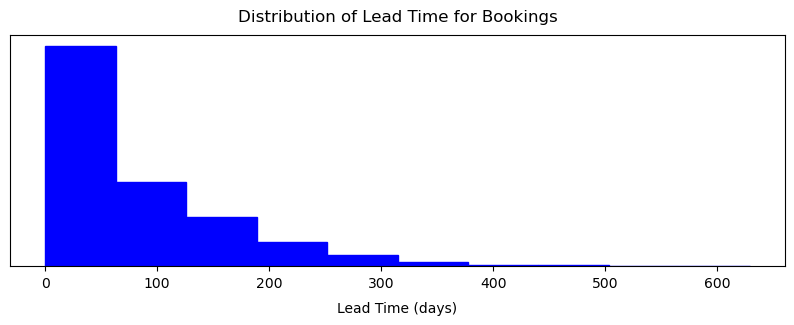

In [153]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Set the plot size and padding
plt.figure(figsize=(10, 3))

# Create histogram for lead_time
plt.hist(data=htl_bk_data, x='lead_time', bins=10, color='b', edgecolor='b')
plt.title("Distribution of Lead Time for Bookings", pad=10)
plt.xlabel("Lead Time (days)", labelpad=8)
plt.ylabel("Frequency")


# Remove y-axis
plt.gca().axes.yaxis.set_visible(False)

# View chart    
plt.show()

#### Analysis of Histogram

- This histogram shows the distribution of lead times for hotel bookings.
- The data indicates that most bookings are made with short lead times, primarily under 100 days.
- As the lead time increases, the frequency of bookings sharply decreases, with very few bookings occurring beyond 300 days. This pattern suggests that customers generally prefer booking closer to their intended arrival date.
- Knowing this, the hotel might focus promotions or reminders on customers in the short lead-time range to optimize occupancy.

#### 2. **Monthly Trend of Booking Cancellations and Possible Influencing Factors**
- **Question**: How do booking changes and waiting list durations impact cancellation rates across months?
- **Purpose**: To examine seasonal trends and the potential impact of booking changes and waiting list durations on cancellation rates

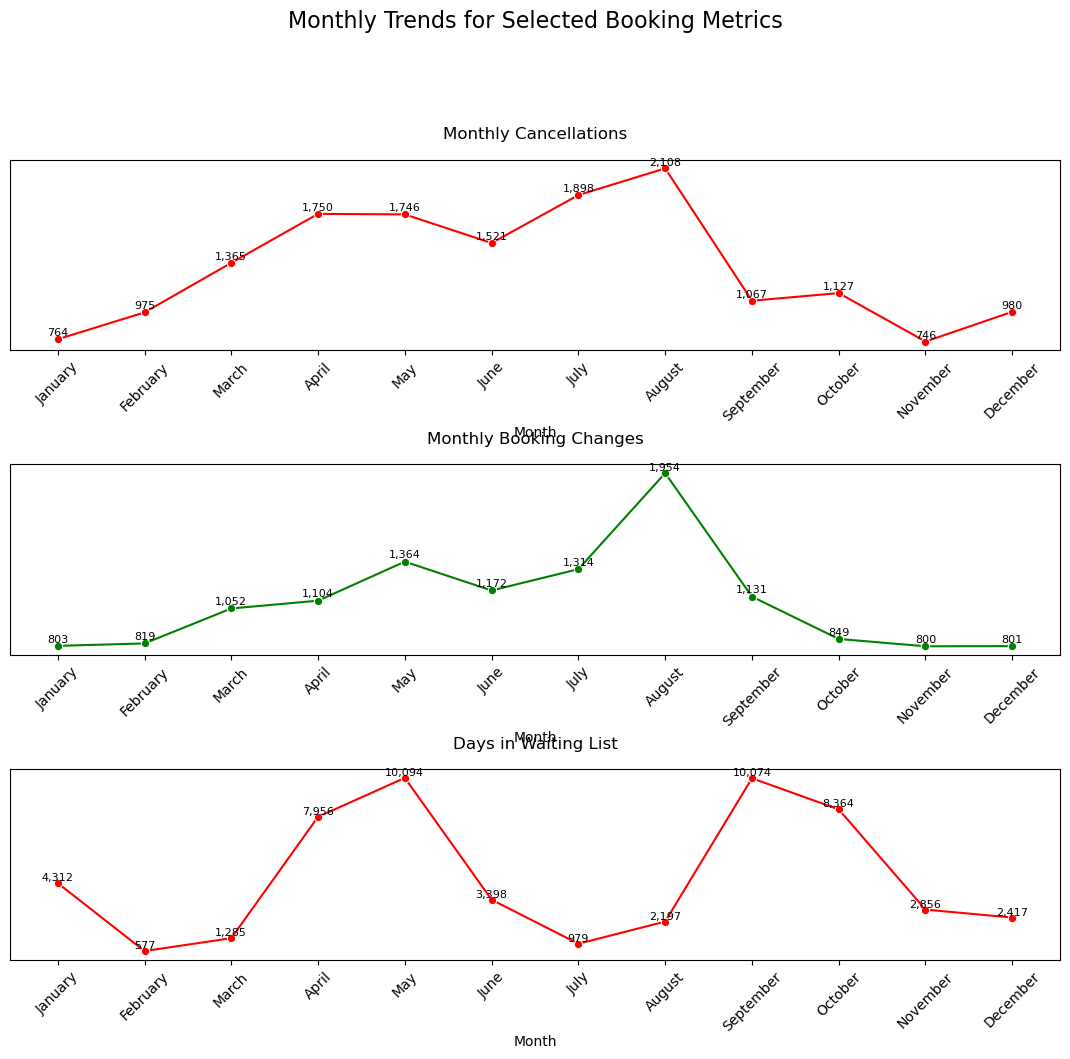

In [151]:
# Group data by month for each field
fields = ['is_canceled', 'booking_changes', 'days_in_waiting_list']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Prepare data for each field
data_by_month = {}
for field in fields:
    if field == 'is_canceled':  # Handle cancellations as a special case
        data_by_month[field] = htl_bk_data[htl_bk_data['is_canceled'] == 'Yes'].groupby('arrival_date_month')['is_canceled'].count().reset_index()
    else:
        data_by_month[field] = htl_bk_data.groupby('arrival_date_month')[field].sum().reset_index()

    # Convert month column to categorical for ordering
    data_by_month[field]['arrival_date_month'] = pd.Categorical(data_by_month[field]['arrival_date_month'], categories=month_order, ordered=True)
    data_by_month[field] = data_by_month[field].sort_values('arrival_date_month')

# Create 3x1 subplots with adjusted padding
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
fig.suptitle("Monthly Trends for Selected Booking Metrics", y=1.05, fontsize=16)

# Adjust the padding around the entire figure
plt.subplots_adjust(left=0.15, right=0.85, top=0.9, bottom=0.1, hspace=0.6)

# Define subplot titles and axis labels
plot_info = {
    'is_canceled': ("Monthly Cancellations", "Number of Cancellations"),
    'booking_changes': ("Monthly Booking Changes", "Number of Changes"),
    'days_in_waiting_list': ("Days in Waiting List", "Days in Waiting List")
}

# Plot each field in its respective subplot
for i, (field, ax) in enumerate(zip(fields, axes.flat)):
    sns.lineplot(x='arrival_date_month', y=field, data=data_by_month[field], marker='o', ax=ax, color='r' if i % 2 == 0 else 'g')
    ax.set_title(plot_info[field][0], pad=15, fontsize=12)
    ax.set_xlabel("Month", labelpad=1)
    ax.set_ylabel(plot_info[field][1], labelpad=15)
    ax.set_xticklabels(month_order, rotation=45)

    # Hide y-axis for a cleaner look
    ax.yaxis.set_visible(False)

    # Add data labels with commas and adjusted y-positions
    for j, row in data_by_month[field].iterrows():
        if row[field] == max(data_by_month[field][field]):  # Adjust for the highest value
            y_pos = row[field] + 5  # Increase y-position for the highest value
        else:
            y_pos = row[field] + 10  # Default padding
        ax.text(row['arrival_date_month'], y_pos, f'{int(row[field]):,}', ha='center', va='bottom', fontsize=8)

# Show the adjusted plot
plt.show()

#### Analysis of Line Charts
- From January to May, cancellations increase from 764 to 1,746, alongside a rise in booking changes from 803 to 1,364.
- Cancellations dropped in June(1,521) and increased in August(2,108), matching that of booking changes increased from 1,172 to 1,954. 
- Cancellations drop from September (1,067) to November (746), matching decreases in booking changes and waiting list days.
- These insights could imply that higher booking changes and longer waiting list durations are linked to increased cancellation rates, as seen with peaks in July and August.
- Reducing booking changes and waiting times may help lower cancellations, though other factors may also influence these rates.


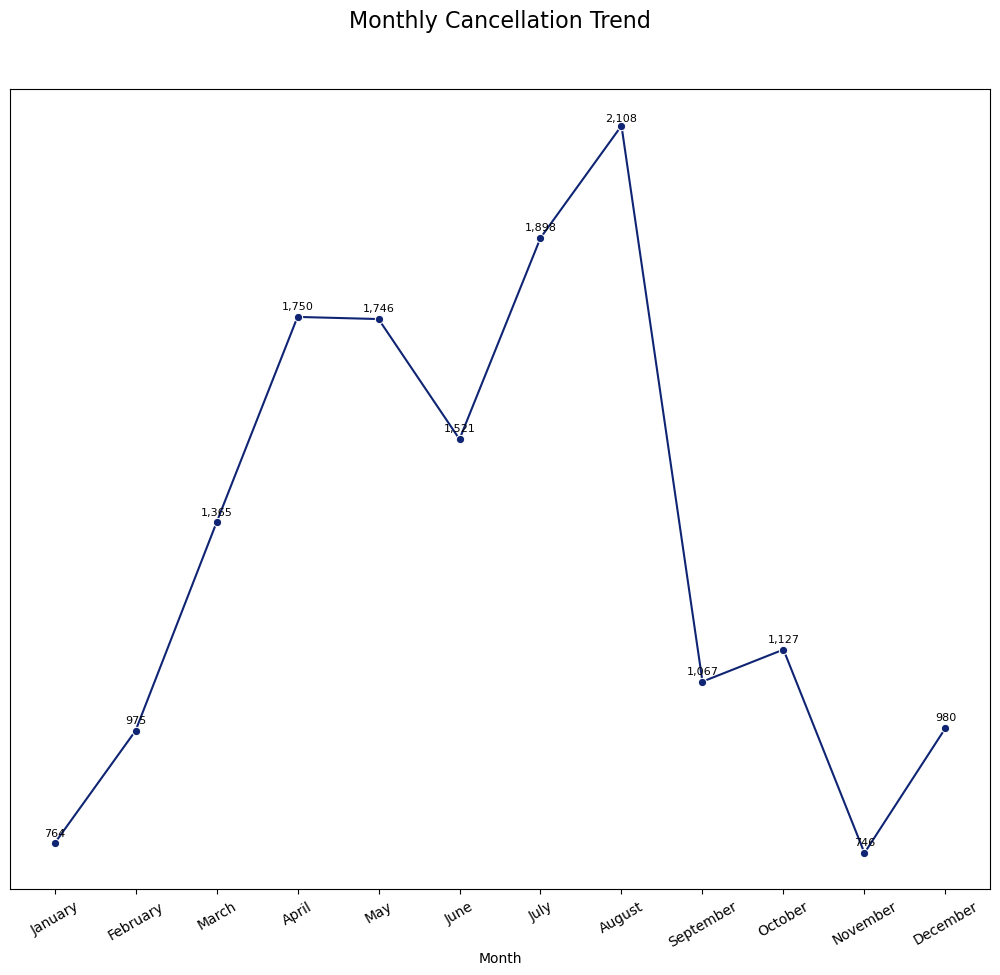

In [155]:
# Group data by month for cancellations
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Prepare cancellation data
cancellation_data = htl_bk_data[htl_bk_data['is_canceled'] == 'Yes'].groupby('arrival_date_month')['is_canceled'].count().reset_index()

# Convert month column to categorical for ordering
cancellation_data['arrival_date_month'] = pd.Categorical(cancellation_data['arrival_date_month'], categories=month_order, ordered=True)
cancellation_data = cancellation_data.sort_values('arrival_date_month')

# Create figure with adjusted padding
fig, ax = plt.subplots(figsize=(14, 10))
fig.suptitle("Monthly Cancellation Trend", fontsize=16)
plt.subplots_adjust(left=0.15, right=0.85, top=0.9, bottom=0.1)

# Plot cancellation trend
sns.lineplot(x='arrival_date_month', y='is_canceled', data=cancellation_data, marker='o', ax=ax, color='#0f2573')

# Set title and labels
ax.set_xlabel("Month", labelpad=1)
ax.set_ylabel("Number of Cancellations", labelpad=2)

# Set x-axis tick labels
ax.set_xticklabels(month_order, rotation=30)

# Hide y-axis for a cleaner look
ax.yaxis.set_visible(False)

# Add data labels with commas and adjusted y-positions
for j, row in cancellation_data.iterrows():
    if row['is_canceled'] == max(cancellation_data['is_canceled']):
        y_pos = row['is_canceled'] + 5  # Increase y-position for the highest value
    else:
        y_pos = row['is_canceled'] + 10  # Default padding
    ax.text(row['arrival_date_month'], y_pos, f'{int(row["is_canceled"]):,}', ha='center', va='bottom', fontsize=8)

# save and Show the adjusted plot
plt.savefig('line.png')
plt.show()

### 3. **Count Plot of Cancellation Rate By Deposit Type**
   - **Research Question**: How does cancellation vary across Deposit types ?
   - **Purpose**: Investigate if cancellation rate is influenced by the type of deposit.


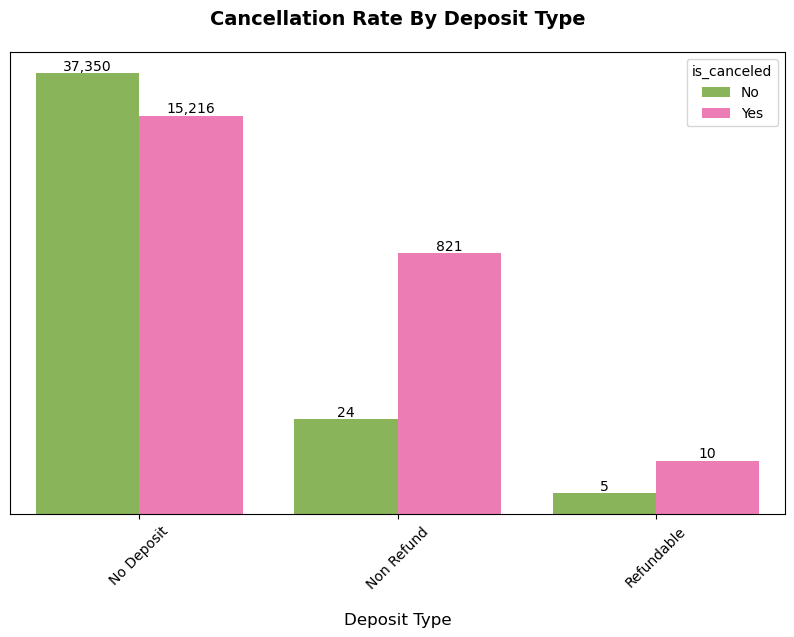

In [31]:
#### Set figure size and padding for readability
plt.figure(figsize=(10, 6))
plt.tight_layout(pad=3)

# Plot churn rate by DepositType
sns.countplot(data=htl_bk_data, x='deposit_type', hue='is_canceled', palette=['#8BC34A', '#FF69B4'])

# Add title and labels with increased padding
plt.title('Cancellation Rate By Deposit Type', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Deposit Type', labelpad=15, fontsize=12)
plt.ylabel('Count', labelpad=15, fontsize=12)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Display data labels with commas
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='{:,.0f}', fontsize=10)

# Set x-axis tick labels with a rotation of 45 degrees for readability
plt.xticks(rotation=45, fontsize=10)

# Optionally remove the y-axis for a cleaner look
plt.gca().yaxis.set_visible(False)

plt.show()

#### Analysis of Chart

- This chart shows the distribution of booking cancellations across different deposit types.
- The **No Deposit** option has the highest count of bookings, with 37,350 non-canceled and 15,216 canceled reservations.
- The **Non Refund** and **Refundable** options have significantly fewer bookings.
- Only 821 bookings with Non Refund deposits were canceled, and the Refundable category has minimal cancellations.
- This suggests that customers are more likely to cancel bookings when they don’t have a deposit or financial commitment, while bookings with a deposit show much lower cancellation rates.


### 4. **Bar Chart of with Cancellation Rate By Guess Status(Repeated or Non-repeated Guests)**
   - **Research Question**: How does cancellation rate vary across customer status?
   - **Purpose**: Identify cancellation rates for repeated and non-repeated guest categories.


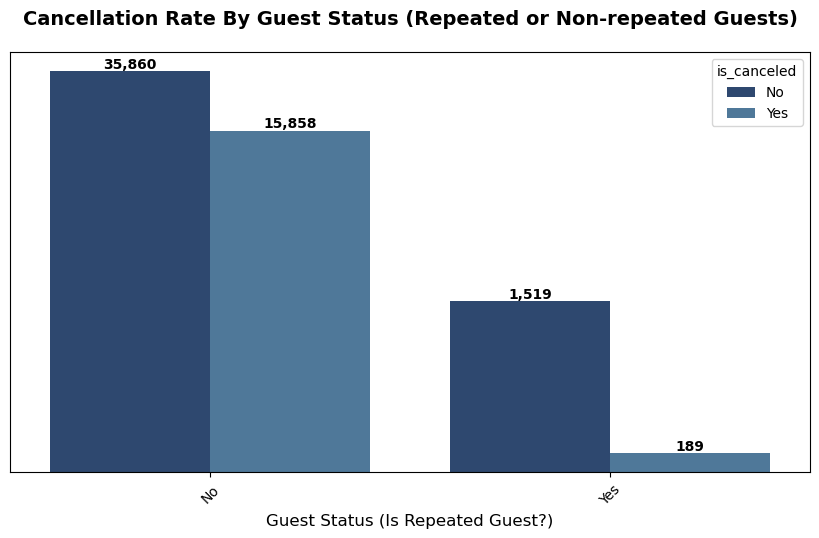

In [158]:
# Set plot size and padding
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Create count plot for is_repeated_guest vs. cancellation status
sns.countplot(data=htl_bk_data, x='is_repeated_guest', hue='is_canceled', palette=['#23467A', '#4379A5'])

plt.title("Cancellation Rate By Guest Status (Repeated or Non-repeated Guests)", pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Guest Status (Is Repeated Guest?)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Add data labels with increased font size and bold text
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom', fontsize=10, fontweight='bold')

# Optionally remove y-axis for a cleaner look
plt.gca().axes.yaxis.set_visible(False)

# Display the plot
plt.savefig('chat1.png')
plt.show()

**Analysis of Chart**

- The chart shows that non-repeated guests have a significantly higher number of cancellations, with 15,858 cancellations compared to only 189 cancellations for repeated guests.
- Non-repeated guests also have a higher total volume of bookings (35,860 that did not cancel) compared to repeated guests (1,519 that did not cancel). This indicates that non-repeated guests are more likely to cancel compared to repeated guests.
- The data suggests that repeat guests may be more reliable and less prone to canceling their bookings.
- It also implies that guest type could have an impact on cancellation rate.

### 5. **Bar Chart of with Cancellation Rate By Meal Type**
   - **Research Question**: How does cancellation rate vary across Meal Types?
   - **Purpose**: Determine if cancellation rate is influenced by meal types.

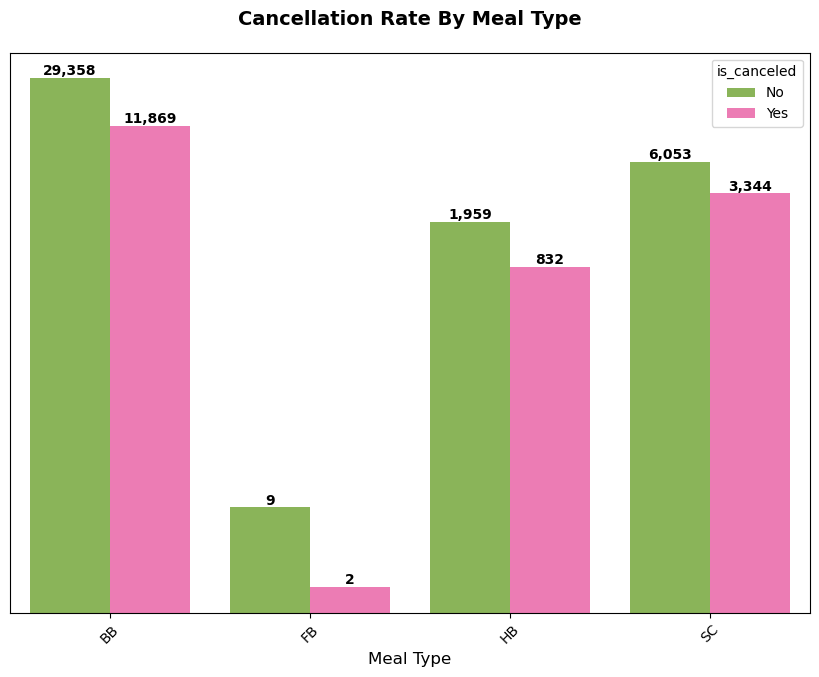

In [33]:
# Set plot size and padding
plt.figure(figsize=(10, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Create count plot for meal vs. cancellation status
sns.countplot(data=htl_bk_data, x='meal', hue='is_canceled', palette=['#8BC34A', '#FF69B4'])

plt.title("Cancellation Rate By Meal Type", pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Meal Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Add data labels with increased font size and bold text
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom', fontsize=10, fontweight='bold')

# Optionally remove y-axis for a cleaner look
plt.gca().axes.yaxis.set_visible(False)

# Display the plot
plt.show()

#### Analysis of Chart

1. **Cancellation rates are significantly higher for some meal types.** The meal types BB and SC have the highest number of cancellations. 
2. **Meal type BB has the highest number of reservations.** This indicates that BB is a popular meal type, but also has a high cancellation rate.
3. **Meal type FB has the lowest cancellation rate.** This suggests that this meal type may be less prone to cancellations.
4. **The chart does not show the total number of reservations for each meal type.** This information would be helpful to understand the overall impact of cancellations on each meal type. 
5. **Further analysis is needed to understand the reasons behind the variations in cancellation rates.** Factors like pricing, availability, and customer preferences could be investigated. 


### 6. **Box plots for Numerical fields**
**Research Question**: What is the distribution of the numerical fields?
**Purpose**: Identify fields with outliers and penalize these outliers to improve ML model performance.

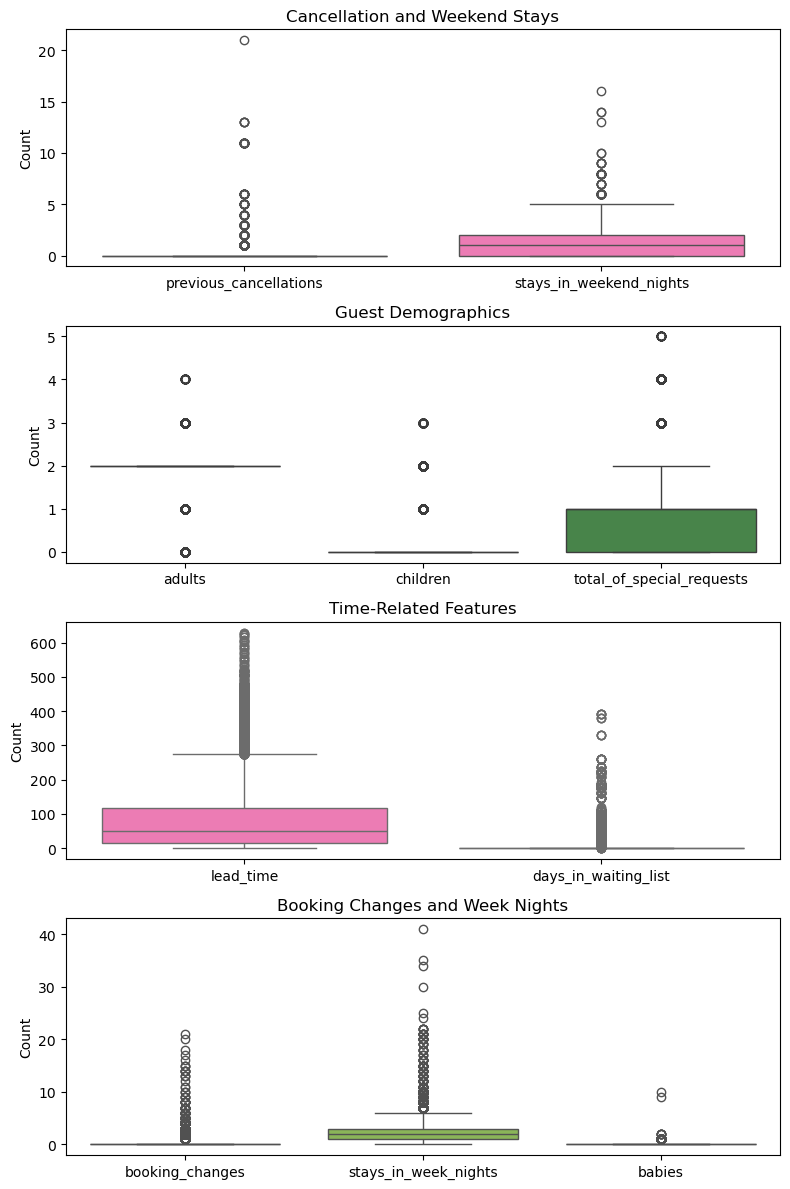

In [34]:
# Define numerical fields
fields1 = ['previous_cancellations', 'stays_in_weekend_nights']
fields2 = ['adults', 'children', 'total_of_special_requests']
fields3 = ['lead_time', 'days_in_waiting_list']
fields4 = ['booking_changes', 'stays_in_week_nights', 'babies']

# Create figure and axis
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8, 12))

# Set color palette
sns.set_palette(['#32CD32', '#FFFF00', '#8BC34A'])  # Lime, Yellow, Green

# Create box plots for each group
sns.boxplot(data=htl_bk_data[fields1], ax=ax[0], palette=['#8BC34A', '#FF69B4'])
ax[0].set_title('Cancellation and Weekend Stays')
ax[0].set_ylabel('Count')

sns.boxplot(data=htl_bk_data[fields2], ax=ax[1], palette=['#8BC34A', '#FF69B4', '#3E8E41'])
ax[1].set_title('Guest Demographics')
ax[1].set_ylabel('Count')

sns.boxplot(data=htl_bk_data[fields3], ax=ax[2], palette=['#FF69B4', '#FF69B4'])
ax[2].set_title('Time-Related Features')
ax[2].set_ylabel('Count')

sns.boxplot(data=htl_bk_data[fields4], ax=ax[3], palette=['#8BC34A', '#8BC34A', '#FF69B4'])
ax[3].set_title('Booking Changes and Week Nights')
ax[3].set_ylabel('Count')

# Layout adjustments
plt.tight_layout()
plt.show()

#### Analysis of Box Plots(add the rest...)


**Previous Cancellations:** The majority of customers have not made previous cancellations, as most data points are clustered around 0.
There are a few outliers with a higher number of previous cancellations.

**Lead Time:** The median lead time is around 200 days
The distribution is heavily right-skewed, with a long tail towards higher lead times. This indicates that a significant number of bookings are made well in advance.

**Booking Changes:** Most bookings have a low number of changes, with the median around 3.
There are outliers with a much higher number of changes, suggesting some bookings go through multiple revisions.

**Days in Waiting List:**
Most bookings do not experience significant waiting periods, with the median close to 0.
There are a few outliers with longer waiting times, indicating that some bookings have to wait for confirmation.

### 7. **Heatmap of Correlations Between Numeric Variables**
   - **Research Question**: What relationships exist between numeric features?
   - **Purpose**: Investigates if there is multicolinearity between features which can affect model performance.


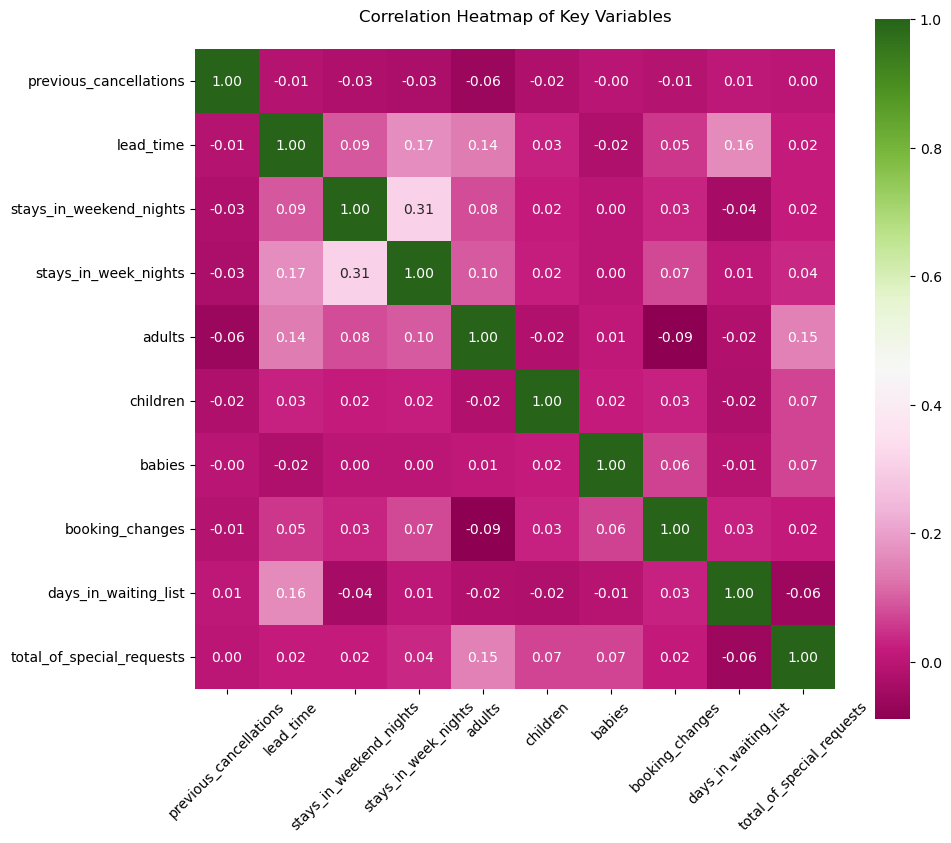

<Figure size 640x480 with 0 Axes>

In [35]:
# Calculate correlation matrix
corr = htl_bk_data[['previous_cancellations', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'booking_changes', 'days_in_waiting_list', 'total_of_special_requests']].corr()

# Set plot size and padding
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Create heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='PiYG', square=True)
plt.title("Correlation Heatmap of Key Variables", pad=20)

# rotate x ticks
plt.xticks(rotation=45)

# view plot
plt.show()

# Save graph
plt.savefig('heatmap.png')

#### Analysis of Heat Map

Here are five insights and an inference based on the correlation heatmap of key variables:

1. **Previous Cancellations** shows minimal correlation with other features, indicating that it operates relatively independently within the dataset.
2. **Lead Time** has a weak positive correlation with **days_in_waiting_list** (0.16), suggesting that longer lead times might slightly increase the likelihood of waiting list days.
3. **Stays in Weekend Nights** and **Stays in Week Nights** have a moderate positive correlation (0.31), indicating that longer weekend stays may coincide with longer stays during the week.
4. **Adults** has a minor positive correlation with **total_of_special_requests** (0.15), suggesting that bookings with more adults may have slightly more special requests.
5. **Children** and **Babies** have low or near-zero correlations with most other variables, which might imply they have limited influence on the other features.

Overall, most correlations are weak, implying that these features are largely independent and may each contribute uniquely to a predictive model, rather than being redundant.

# Model Development

### Develop a classification model to predict whether a customer will cancel a reservation or not.
Models to be built:
- **Random Forest (RF)**
- **Support Vector Machines (SVM)**
- **Logistic Regression (LR)**
- **Gradient Boosting (GB)**
- **XGBoost**

**Why these models are suitable for our dataset:**

- *High row count (53426)*: Random Forest, Gradient Boosting, and XGBoost can handle large datasets.
  
- *Categorical and numerical features*: SVM, Logistic Regression, and XGBoost can handle mixed feature types.
  
- *Outliers*: Random Forest, Gradient Boosting, and XGBoost are robust to outliers.

### Data features relevant for model training include:
**'previous_cancellations', 'is_repeated_guest', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'deposit_type', 'booking_changes', 'days_in_waiting_list', 'total_of_special_requests', 'arrival_date_month','market_segment', 'distribution_channel','customer_type', 'required_car_parking_spaces', 'is_canceled'**

- From the previous analysis made, all these factors may affect the likelihood of a customer cancelling a reservation or not. 
- There is no multicollinearity between numerical fields as indicated by the heat plot.

## Data Pre-processing for Model Development

In [36]:
# Select relevant fields for model development
#data = htl_bk_data[['lead_time', 'deposit_type', 'market_segment', 'booking_changes', 'is_canceled']]
#data

#data = htl_bk_data[['lead_time', 'deposit_type', 'market_segment', 'booking_changes','previous_cancellations','distribution_channel','customer_type','days_in_waiting_list','stays_in_weekend_nights','stays_in_week_nights','is_canceled']]
#data

data = htl_bk_data[['previous_cancellations', 'is_repeated_guest', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'deposit_type', 'booking_changes', 'days_in_waiting_list', 'total_of_special_requests', 'arrival_date_month','market_segment', 'distribution_channel','customer_type', 'required_car_parking_spaces', 'is_canceled']]
data

,previous_cancellations,is_repeated_guest,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,deposit_type,booking_changes,days_in_waiting_list,total_of_special_requests,arrival_date_month,market_segment,distribution_channel,customer_type,required_car_parking_spaces,is_canceled
0,0,No,6,0,2,1,0.0,0,HB,No Deposit,0,0,0,July,Offline TA/TO,TA/TO,Transient,0,No
1,0,No,88,0,4,2,0.0,0,BB,No Deposit,0,0,1,July,Online TA,TA/TO,Transient,0,Yes
2,0,No,65,0,4,1,0.0,0,BB,No Deposit,0,0,1,July,Online TA,TA/TO,Transient,0,Yes
3,0,No,92,2,4,2,0.0,0,BB,No Deposit,0,0,2,July,Online TA,TA/TO,Transient,0,Yes
4,0,No,100,0,2,2,0.0,0,BB,No Deposit,0,0,1,July,Online TA,TA/TO,Transient,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,No,23,2,5,2,0.0,0,BB,No Deposit,0,0,0,August,Offline TA/TO,TA/TO,Transient,0,No
79326,0,No,102,2,5,3,0.0,0,BB,No Deposit,0,0,2,August,Online TA,TA/TO,Transient,0,No
79327,0,No,34,2,5,2,0.0,0,BB,No Deposit,0,0,4,August,Online TA,TA/TO,Transient,0,No
79328,0,No,109,2,5,2,0.0,0,BB,No Deposit,0,0,0,August,Online TA,TA/TO,Transient,0,No


#### Create separate data frames for Numerical and categorical fields

In [37]:
# Create a data frame for numerical field
#df_numfields = data.drop([ 'is_canceled', 'deposit_type','market_segment'], axis = 1)
#df_numfields = df_numfields.reset_index(drop = True)
#df_numfields

#df_numfields = data.drop([ 'is_canceled', 'deposit_type','market_segment', 'customer_type','distribution_channel'], axis = 1)
#df_numfields = df_numfields.reset_index(drop = True)
#df_numfields

df_numfields = data.drop([ 'is_canceled', 'deposit_type','is_repeated_guest', 'meal','arrival_date_month','market_segment', 'distribution_channel','customer_type'], axis = 1)
df_numfields = df_numfields.reset_index(drop = True)
df_numfields

,previous_cancellations,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,days_in_waiting_list,total_of_special_requests,required_car_parking_spaces
0,0,6,0,2,1,0.0,0,0,0,0,0
1,0,88,0,4,2,0.0,0,0,0,1,0
2,0,65,0,4,1,0.0,0,0,0,1,0
3,0,92,2,4,2,0.0,0,0,0,2,0
4,0,100,0,2,2,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
53421,0,23,2,5,2,0.0,0,0,0,0,0
53422,0,102,2,5,3,0.0,0,0,0,2,0
53423,0,34,2,5,2,0.0,0,0,0,4,0
53424,0,109,2,5,2,0.0,0,0,0,0,0


In [124]:
df_numfields.columns

Index(['previous_cancellations', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'booking_changes', 'days_in_waiting_list', 'total_of_special_requests',
       'required_car_parking_spaces'],
      dtype='object')

In [38]:
# Create data frame for categorical columns
#df_cat = data[['deposit_type', 'market_segment']].reset_index(drop = True)
#df_cat

df_cat1 = data[['deposit_type', 'is_repeated_guest','meal','market_segment', 'distribution_channel','customer_type']].reset_index(drop = True)
df_cat1

,deposit_type,is_repeated_guest,meal,market_segment,distribution_channel,customer_type
0,No Deposit,No,HB,Offline TA/TO,TA/TO,Transient
1,No Deposit,No,BB,Online TA,TA/TO,Transient
2,No Deposit,No,BB,Online TA,TA/TO,Transient
3,No Deposit,No,BB,Online TA,TA/TO,Transient
4,No Deposit,No,BB,Online TA,TA/TO,Transient
...,...,...,...,...,...,...
53421,No Deposit,No,BB,Offline TA/TO,TA/TO,Transient
53422,No Deposit,No,BB,Online TA,TA/TO,Transient
53423,No Deposit,No,BB,Online TA,TA/TO,Transient
53424,No Deposit,No,BB,Online TA,TA/TO,Transient


In [39]:
# Create data frame for only month of arrival
df_cat2 = data[['arrival_date_month']].reset_index(drop = True)
df_cat2

,arrival_date_month
0,July
1,July
2,July
3,July
4,July
...,...
53421,August
53422,August
53423,August
53424,August


In [40]:
# create dataframe for target variable
target_var = data[['is_canceled']].reset_index(drop = True)

#view 
target_var

,is_canceled
0,No
1,Yes
2,Yes
3,Yes
4,Yes
...,...
53421,No
53422,No
53423,No
53424,No


#### Encode categorical fields

In [42]:
# Cat1 has nominal categorical features, hence will be encoded by OneHotEncoding using sklearn
# import relevant library
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder()  

# Encode categories
encoded_data1 = encoder.fit_transform(df_cat1)
encoded_data1

<53426x25 sparse matrix of type '<class 'numpy.float64'>'
	with 320556 stored elements in Compressed Sparse Row format>

In [43]:
# Get column names and create a data frame with encoded data
column_names = encoder.get_feature_names_out()
df_encfeat1 = pd.DataFrame(encoded_data1.toarray(), columns = column_names )

# View dataframes
df_encfeat1 = df_encfeat1.reset_index(drop = True)
df_encfeat1

,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,is_repeated_guest_No,is_repeated_guest_Yes,meal_BB,meal_FB,meal_HB,meal_SC,market_segment_Aviation,...,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53421,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
53422,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
53423,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
53424,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### Encode arrival date month by LabelEnconding since it is an ordinal categorical field

In [44]:
# Creating a mapping of month names to numbers
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4,
    "May": 5, "June": 6, "July": 7, "August": 8,
    "September": 9, "October": 10, "November": 11, "December": 12
}

# Ensuring the column is of type string
df_cat2_ecd = df_cat2['arrival_date_month'].map(month_mapping)
df_cat2_ecd = pd.DataFrame(df_cat2_ecd, columns=['arrival_date_month'])

In [45]:
df_cat2_ecd

,arrival_date_month
0,7
1,7
2,7
3,7
4,7
...,...
53421,8
53422,8
53423,8
53424,8


In [46]:
# change df_cat2_ecd to float type
df_cat2_ecd = df_cat2_ecd.astype('int')
df_cat2_ecd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53426 entries, 0 to 53425
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   arrival_date_month  53426 non-null  int32
dtypes: int32(1)
memory usage: 208.8 KB


#### Join encoded categorical, scaled numerical and target dataframes

In [47]:
# Re-ddd encoded fields to numerical fields to obtain the original dataset
data1 = pd.concat([df_numfields, df_encfeat1, df_cat2_ecd, target_var], axis = 1)

# View data
data1

,previous_cancellations,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,days_in_waiting_list,total_of_special_requests,...,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,arrival_date_month,is_canceled
0,0,6,0,2,1,0.0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,No
1,0,88,0,4,2,0.0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,Yes
2,0,65,0,4,1,0.0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,Yes
3,0,92,2,4,2,0.0,0,0,0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,Yes
4,0,100,0,2,2,0.0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53421,0,23,2,5,2,0.0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8,No
53422,0,102,2,5,3,0.0,0,0,0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8,No
53423,0,34,2,5,2,0.0,0,0,0,4,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8,No
53424,0,109,2,5,2,0.0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8,No


#### Encode target Variable

In [48]:
# Encode using map() function:

data1['is_canceled'] = data1['is_canceled'].map({'No': 0, 'Yes': 1})
data1

,previous_cancellations,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,days_in_waiting_list,total_of_special_requests,...,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,arrival_date_month,is_canceled
0,0,6,0,2,1,0.0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,0
1,0,88,0,4,2,0.0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,1
2,0,65,0,4,1,0.0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,1
3,0,92,2,4,2,0.0,0,0,0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,1
4,0,100,0,2,2,0.0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53421,0,23,2,5,2,0.0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8,0
53422,0,102,2,5,3,0.0,0,0,0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8,0
53423,0,34,2,5,2,0.0,0,0,0,4,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8,0
53424,0,109,2,5,2,0.0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8,0


In [49]:
# change target var to float dtype
data1['is_canceled'] = data1['is_canceled'].astype('int')

In [50]:
# view data1
data1

,previous_cancellations,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,days_in_waiting_list,total_of_special_requests,...,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,arrival_date_month,is_canceled
0,0,6,0,2,1,0.0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,0
1,0,88,0,4,2,0.0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,1
2,0,65,0,4,1,0.0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,1
3,0,92,2,4,2,0.0,0,0,0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,1
4,0,100,0,2,2,0.0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53421,0,23,2,5,2,0.0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8,0
53422,0,102,2,5,3,0.0,0,0,0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8,0
53423,0,34,2,5,2,0.0,0,0,0,4,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8,0
53424,0,109,2,5,2,0.0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8,0


In [51]:
# recheck data1 info
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53426 entries, 0 to 53425
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   previous_cancellations          53426 non-null  int64  
 1   lead_time                       53426 non-null  int64  
 2   stays_in_weekend_nights         53426 non-null  int64  
 3   stays_in_week_nights            53426 non-null  int64  
 4   adults                          53426 non-null  int64  
 5   children                        53426 non-null  float64
 6   babies                          53426 non-null  int64  
 7   booking_changes                 53426 non-null  int64  
 8   days_in_waiting_list            53426 non-null  int64  
 9   total_of_special_requests       53426 non-null  int64  
 10  required_car_parking_spaces     53426 non-null  int64  
 11  deposit_type_No Deposit         53426 non-null  float64
 12  deposit_type_Non Refund         

#### Define X and y Features

In [52]:
# Separate data into predictor variables (X) and target variable (y)
X = data1.drop(['is_canceled'], axis=1)
y = data1['is_canceled']


#### Check for Class imbalance on Data

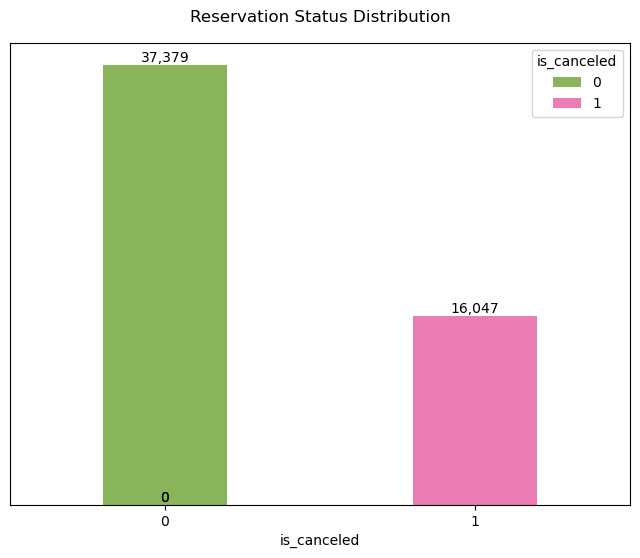

In [53]:
# set figsize
plt.figure(figsize=(8, 6))

# Generate a count plot distribution by 'is_canceled'
sns.countplot(data1, x='is_canceled', hue='is_canceled', width=0.4, palette=['#8BC34A', '#FF69B4'])

# Add chart title
plt.title('Reservation Status Distribution', pad=15)

# Add data labels 
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', 
                       (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom', fontsize=10)  

# Remove the y-axis
plt.gca().yaxis.set_visible(False)

plt.show()

Data is higly imbalanced. 

#### Split data and Implement SMOTE technique to Balance Class on Training Data

In [54]:
# Import necessary libraries
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Use Chi test For Feature Selection

In [55]:
# import relevant library
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=10)
selector.fit(X_train, y_train)

# Get selected features
support = selector.get_support()
selected_features = X_train.columns[support]u

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['lead_time', 'stays_in_week_nights', 'booking_changes',
       'total_of_special_requests', 'required_car_parking_spaces',
       'deposit_type_Non Refund', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'distribution_channel_Direct',
       'customer_type_Transient-Party'],
      dtype='object')


#### Ten (10) main features were selected. They include:
'lead_time', 'stays_in_week_nights', 'booking_changes', 'total_of_special_requests', 'required_car_parking_spaces','deposit_type_Non Refund', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'distribution_channel_Direct', 'customer_type_Transient-Party'

In [57]:
# Transform data using selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

#### Check for Class Imbalance on Training Set

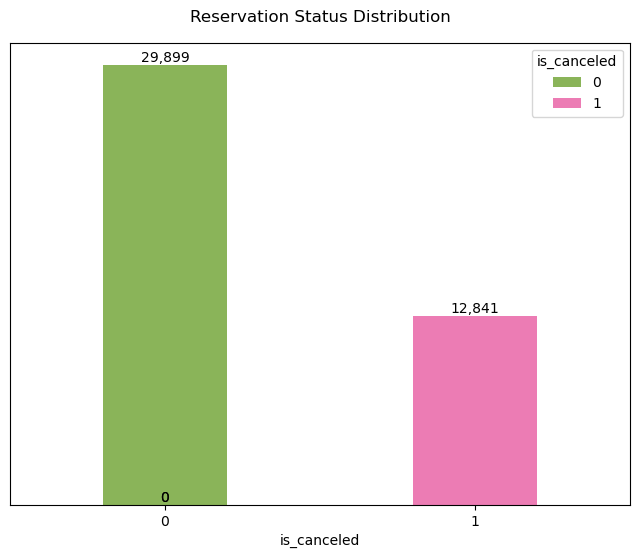

In [63]:
# change y_train to df
y_train = pd.DataFrame(data=y_train)

# set figsize
plt.figure(figsize=(8, 6))

# Generate a count plot distribution by 'is_canceled'
sns.countplot(y_train, x='is_canceled', hue='is_canceled', width=0.4, palette=['#8BC34A', '#FF69B4'])

# Add chart title
plt.title('Reservation Status Distribution', pad=15)

# Add data labels 
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', 
                       (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom', fontsize=10)  

# Remove the y-axis
plt.gca().yaxis.set_visible(False)

plt.show()

Imbalanced data resulted in imbalanced class on training data. The minority class which is the `Yes Class` represents 30% of the training data. 

#### SMOTE Technique

Class is now balanced on training data

#### Oversampling Technique

In [66]:
# Import relevant libraries
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Initialize oversampler
ros = RandomOverSampler(random_state=42)

# Generate synthetic samples
X_resampled, y_resampled = ros.fit_resample(X_train_selected, y_train)

# Check the distribution after oversampling
print("Class balance (training data):")
print(np.unique(y_resampled, return_counts=True))


Class balance (training data):
(array([0, 1]), array([29899, 29899], dtype=int64))


#### Undersampling

In [67]:
# Import relevant libraries
#from imblearn.under_sampling import RandomUnderSampler
#from collections import Counter

# Initialize oversampler
#rus = RandomUnderSampler(random_state=42)

# Generate synthetic samples
#X_resampled, y_resampled = rus.fit_resample(X_train_selected, y_train)

# Check the distribution after oversampling
#print("Class balance (training data):")
#print(np.unique(y_resampled, return_counts=True))

## Random Forest Model Development

In [68]:
#import relevant libraries for model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

#### **Initialize and train RF model**

In [69]:
# Initialise RF object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit model to resampled data and train 
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

#### **Test and Evaluate model**

In [70]:
# Make predictions on the testing data
y_pred = rfc.predict(X_test_selected)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7108366086468276
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      7480
           1       0.51      0.63      0.57      3206

    accuracy                           0.71     10686
   macro avg       0.67      0.69      0.67     10686
weighted avg       0.73      0.71      0.72     10686

Confusion Matrix:
[[5573 1907]
 [1183 2023]]


Model has an overall accuracy of approximately `0.71` which can be improved

##### **Using `GridSearchCV` method to improve model performance**

In [ ]:
# use GridSearchCV to find optimal combinations of parameter values
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 50, 70],
    'max_depth': [15, 15, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}



In [ ]:
# Initialize GridSearchCV to find the best hyperparameters for the RandomForestClassifier
# 'param_grid' specifies the hyperparameters to test, and 'cv=5' performs 5-fold cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)

In [ ]:
# Fit GridSearchCV on the training data (X_train, y_train)
# This will evaluate all specified hyperparameter combinations and find the best one based on cross-validation score
grid_search.fit(X_resampled, y_resampled)


In [ ]:
# Output the best combination of hyperparameters found
print("Best Parameters:", grid_search.best_params_)

# Output the best cross-validation score achieved with the best parameters
print("Best Score:", grid_search.best_score_)

#### Retrain rf model with best parameters

In [ ]:
# Define the best parameters
best_params = {
'max_depth': None,
'max_features': 'sqrt',
'min_samples_leaf': 1,
'min_samples_split': 2,
'n_estimators': 150
}

# Initialize rfc with best parameters
best_rfc = RandomForestClassifier(**best_params, random_state=42)

# Re-train rfc with best parameters and estimators
best_rfc.fit(X_resampled, y_resampled)

# Make predictions
y_pred = best_rfc.predict(X_test_selected)

In [ ]:
# Evaluate model performance
print("Accuracy:", round((accuracy_score(y_test, y_pred)), 2))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#### Generate ROC-AUC 

# Import relevant libraries
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_pred_prob = best_rfc.predict_proba(X_test)[:, 1]

# Compute ROC curve, pos_label='Yes'
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='Yes')

# Plot ROC curve
plt.plot(fpr, tpr, color='black', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='y', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate AUC-ROC
auc = auc(fpr, tpr)
print("AUC-ROC:", round(auc, 2))

# Logistic Regressor Model Development

In [71]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [72]:
# Standardize data to improve model performance and convergence
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)


In [76]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state = 42)
model.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test_selected)

In [77]:
# Evaluate the model
LR_accuracy_score = print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.3318360471645143
Confusion Matrix:
 [[ 360 7120]
 [  20 3186]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.05      0.09      7480
           1       0.31      0.99      0.47      3206

    accuracy                           0.33     10686
   macro avg       0.63      0.52      0.28     10686
weighted avg       0.76      0.33      0.21     10686



##### **Implement GridSearchCV method to improve model perfomance**

In [78]:
# use GridSearchCV to find optimal combinations of parameter values
from sklearn.model_selection import GridSearchCV

# Define hyperparameter tuning grid
param_grid = {
    'penalty': ['l1', 'l2'],                              # Regularization type
    'C': [0.1, 0.5, 0.8],                                 # Regularization strength
    'max_iter': [100, 200, 50],                       # Maximum iterations
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],        # Optimization algorithm
}

In [79]:
# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)

# Perform grid search on training data
grid_search.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 0.5, 0.8], 'max_iter': [100, 200, 50],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [80]:
# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate best model on testing data
best_model = grid_search.best_estimator_
y_pred_lr = best_model.predict(X_test_selected)

# Evaluate the model
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 0.8, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.6896886435566782

Accuracy Score: 0.3318360471645143
Confusion Matrix:
 [[ 360 7120]
 [  20 3186]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.05      0.09      7480
           1       0.31      0.99      0.47      3206

    accuracy                           0.33     10686
   macro avg       0.63      0.52      0.28     10686
weighted avg       0.76      0.33      0.21     10686



# Support Vector Machine Development

In [81]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define SVM model
svm = SVC(random_state=42)


In [82]:
# fit and test SVM
svm.fit(X_resampled, y_resampled)
y_pred = svm.predict(X_test_selected)


In [83]:
# Evaluate the model
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.6026576829496537
Confusion Matrix:
 [[6284 1196]
 [3050  156]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.84      0.75      7480
           1       0.12      0.05      0.07      3206

    accuracy                           0.60     10686
   macro avg       0.39      0.44      0.41     10686
weighted avg       0.51      0.60      0.54     10686



#### Tune Hyperparameters

In [ ]:
# import relevant library
from sklearn.model_selection import GridSearchCV

# Define hyperparameter tuning space
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# Perform GridSearch hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_resampled, y_resampled)

# Print best hyperparameters and score
print("Best SVM Parameters:", grid_search.best_params_)
print("Best SVM Score:", grid_search.best_score_)

In [ ]:
# Train SVM model with best hyperparameters
best_svm = grid_search.best_estimator_
best_svm.fit(X_resampled, y_resampled)

# Make predictions on test data
y_pred_svm = best_svm.predict(X_test_selected)

# Print classification report and accuracy
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# Gradient Boost Classifier Development

In [84]:
# Import relevant libraries
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
# Initialize GBC object
gb = GradientBoostingClassifier(n_estimators=660, learning_rate=0.5, random_state=42)

# Train GBC
gb.fit(X_resampled, y_resampled)

# Test model
y_pred_gb = gb.predict(X_test_selected)


In [86]:
print("Accuracy:", round((accuracy_score(y_test, y_pred)), 2))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.84      0.75      7480
           1       0.12      0.05      0.07      3206

    accuracy                           0.60     10686
   macro avg       0.39      0.44      0.41     10686
weighted avg       0.51      0.60      0.54     10686

Confusion Matrix:
[[6284 1196]
 [3050  156]]


#### Implement GridSearch To Improve Model Performance

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}



In [ ]:
# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search to the training data
grid_search.fit(X_resampled, y_resampled)

# Retrieve the best model
best_gb = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best GBC Score:", grid_search.best_score_)

In [ ]:
# Evaluate the best model on the test data
y_pred_gb_best = best_gb.predict(X_test_selected)

# Print evaluation report
print("Best GB Accuracy:", accuracy_score(y_test, y_pred_gb_best))
print("Best GB Classification Report:")
print(classification_report(y_test, y_pred_gb_best))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


# XGradient Boost Classifier

In [87]:
# import relevant libraries
!pip install xgboost
import xgboost as xgb

In [88]:
# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)

In [89]:
# Train and test model
xgb_model.fit(X_resampled, y_resampled)
y_pred = xgb_model.predict(X_test_selected)

In [90]:
# Print evaluation report
print("Best XGB Accuracy:", accuracy_score(y_test, y_pred))
print("Best XGB Classification Report:")
print(classification_report(y_test, y_pred))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best XGB Accuracy: 0.3521429908291222
Best XGB Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.08      0.15      7480
           1       0.31      0.99      0.48      3206

    accuracy                           0.35     10686
   macro avg       0.62      0.53      0.31     10686
weighted avg       0.74      0.35      0.25     10686

SVM Confusion Matrix:
[[ 603 6877]
 [  46 3160]]


#### Implement GridSearch 

In [ ]:
# use GridSearchCV to find optimal combinations of parameter values
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search to the training data
grid_search.fit(X_resampled, y_resampled)

# Retrieve the best model
best_xgb = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best XGB Score:", grid_search.best_score_)

In [ ]:
# Evaluate the best model on the test data
y_pred_xgb_best = best_xgb.predict(X_test_selected)


# Print evaluation report
print("Best XGB Accuracy:", accuracy_score(y_test, y_pred_xgb_best))
print("Best XGB Classification Report:")
print(classification_report(y_test, y_pred_xgb_best))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_best))

#### Comparison of Model Performances

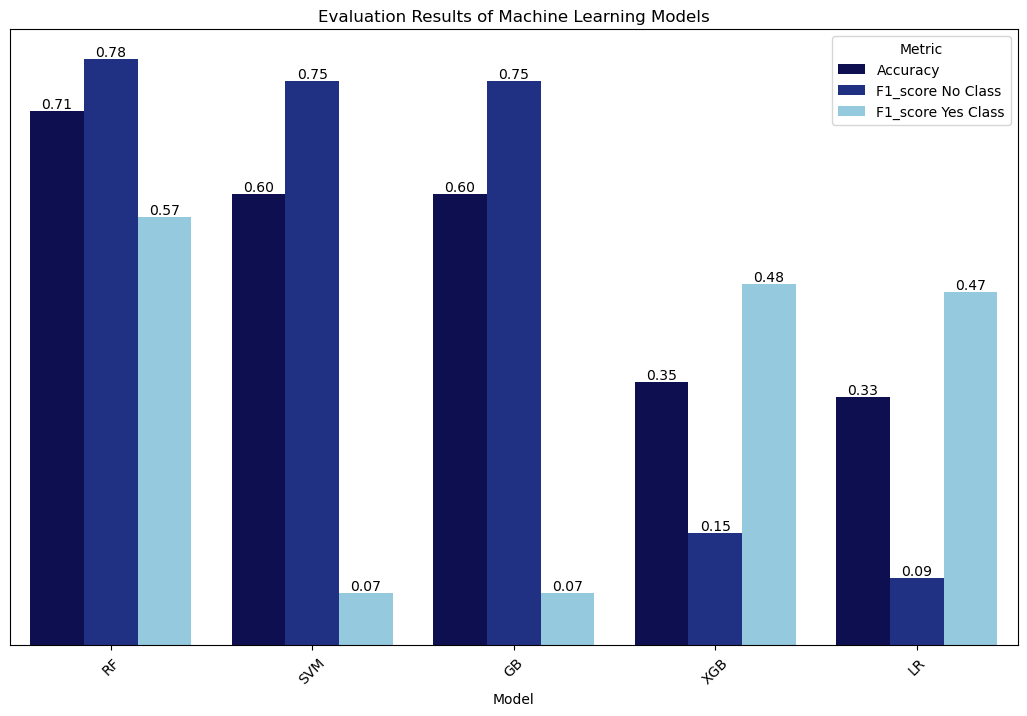

In [123]:
# Create lists for scores and models
models = ['RF', 'LR', 'SVM', 'GB', 'XGB']
accuracy = [0.71, 0.33, 0.60, 0.60, 0.35]
f1score_No_cls = [0.78, 0.09, 0.75, 0.75, 0.15]
f1score_Yes_cls = [0.57, 0.47, 0.07, 0.07, 0.48]

# Create a DataFrame
df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'F1_score No Class': f1score_No_cls,
    'F1_score Yes Class': f1score_Yes_cls,
})

# Sort DataFrame by Accuracy
df = df.sort_values(by='Accuracy', ascending = False)

# Melt DataFrame for plotting
df_melt = pd.melt(df, id_vars=['Model'], value_vars=['Accuracy', 'F1_score No Class', 'F1_score Yes Class'])

# Bar chart
plt.figure(figsize=(13, 8))
sns.barplot(x='Model', y='value', hue='variable', data=df_melt, 
            palette=['#03055B', '#0f2593', '#87CEEB'])

# Add data labels
for p in plt.gca().patches:
    if p.get_height() != 0:
        plt.gca().text(p.get_x() + p.get_width()/2, p.get_height(), 
                       '{:.2f}'.format(p.get_height()), ha='center', va='bottom', size=10)

# Remove y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Set title and labels
plt.title('Evaluation Results of Machine Learning Models')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.xticks(rotation = 45)

# Save graph
plt.savefig('Results.png')

# Show plot
plt.show()


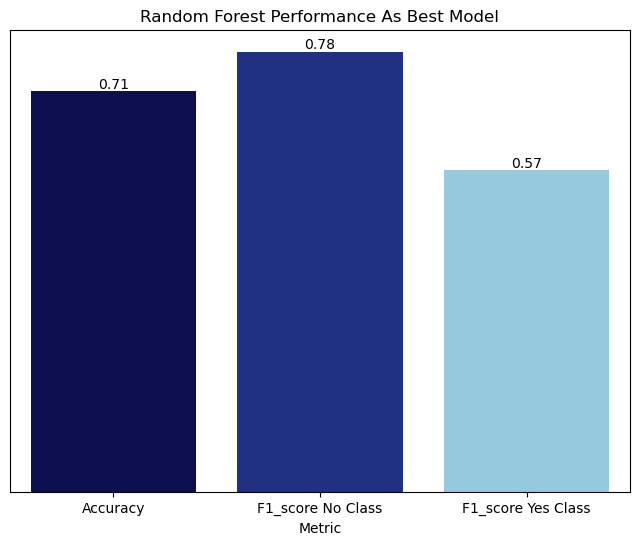

In [121]:
# Create lists for scores
model = ['Random Forest']
accuracy = [0.71]
f1score_No_cls = [0.78]
f1score_Yes_cls = [0.57]

# Create a DataFrame
df = pd.DataFrame({
    'Model': model,
    'Accuracy': accuracy,
    'F1_score No Class': f1score_No_cls,
    'F1_score Yes Class': f1score_Yes_cls,
})

# Melt DataFrame for plotting
df_melt = pd.melt(df, id_vars=['Model'], value_vars=['Accuracy', 'F1_score No Class', 'F1_score Yes Class'])

# Bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='variable', y='value', data=df_melt, 
            palette=['#03055B', '#0f2593', '#87CEEB'])

# Add data labels
for p in plt.gca().patches:
    if p.get_height() != 0:
        plt.gca().text(p.get_x() + p.get_width()/2, p.get_height(), 
                       '{:.2f}'.format(p.get_height()), ha='center', va='bottom', size=10)

# Remove y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Set title and labels
plt.title('Random Forest Performance As Best Model')
plt.xlabel('Metric')
plt.ylabel('Value')

# Save graph
plt.savefig('Random_Forest_Results.png')

# Show plot
plt.show()

# Interpretation of Results

### Metrics Analyzed:
1. **Accuracy**: The proportion of correct predictions out of total predictions.
2. **F1 Score No Class (Dark Blue)**: F1 score for predicting the class of "No Cancellation."
3. **F1 Score Yes Class (Light Blue)**: F1 score for predicting the class of "Cancellation."

### Model Performance Summary:
1. **Random Forest**:
   - **Accuracy**: 0.78
   - **F1 Score No Class**: 0.71
   - **F1 Score Yes Class**: 0.57
   - Random Forest shows the highest accuracy, indicating it performs well overall. However, the F1 score for predicting cancellations ("Yes Class") is moderate, which means it may miss some cancellations.

2. **Support Vector Machine (SVM)**:
   - **Accuracy**: 0.75
   - **F1 Score No Class**: 0.60
   - **F1 Score Yes Class**: 0.07
   - SVM has decent accuracy but struggles significantly with the "Yes Class," as indicated by a very low F1 score (0.07), making it less reliable for predicting cancellations.

3. **Gradient Boosting**:
   - **Accuracy**: 0.75
   - **F1 Score No Class**: 0.60
   - **F1 Score Yes Class**: 0.07
   - Gradient Boosting has similar metrics to SVM, showing acceptable accuracy but very low performance in predicting cancellations.

4. **XGBoost**:
   - **Accuracy**: 0.48
   - **F1 Score No Class**: 0.35
   - **F1 Score Yes Class**: 0.15
   - XGBoost shows low performance across all metrics, making it the least effective model in this case.

5. **Logistic Regression**:
   - **Accuracy**: 0.47
   - **F1 Score No Class**: 0.33
   - **F1 Score Yes Class**: 0.09
   - Logistic Regression performs slightly better than XGBoost in terms of accuracy and F1 scores but still falls short compared to the other models.

### Best Model Selection
The **Random Forest** model appears to be the best choice. It has the highest accuracy (0.78) and relatively balanced F1 scores for both classes, especially compared to other models. While the F1 score for the "Yes Class" could be better, this model provides the best balance between predicting both cancellation and non-cancellation outcomes.

# Project Limitations


- Computational Constraints: We encountered processing and memory limitations which limited our ability to iterate quickly and refine the models.
- Class Imbalance: Our data had imbalanced classes which can lead to overfitting on the majority class, requiring targeted adjustments to improve performance on minority classes.
- Evaluation Complexity: Cross-validation on this dataset size is computationally demanding, leading us to explore more efficient evaluation strategies.

# Recommendations To The Hotel

- Non-repeated guests have a higher cancellation rate. We recommend targeted promotions to reduce cancellations and encourage loyalty.- 
70% of customers arrive within 70 days of booking. We recommend the hotel utilize this window to enhance services, boosting customer retention and satisfaction.- 
Get a robust database and a data analyst to gather their data to avoid missing data and error entries.
